# Representación de imágenes en Python

## Primero que nada

En lo que sigue, es importante recordar que Python es un lenguaje de _propósito general_. A diferencia de otros lenguajes como R, no tiene ningún tipo de previsión especial en su definición para trabajar con datos que no sean números, texto y algunas estructuras de propósito general como _listas_ (`list`) o _diccionarios_ (`dict`). 

Python no tiene una forma predefinida de trabajar con vectores, matrices, tablas, etc. En particular Python no define cómo debe representarse una imagen.

## Matrices, vectores, tablas

Para poder trabajar con todo lo anterior, es necesario utilizar _bibliotecas_  desarrolladas por terceros (es decir, por gente ajena al desararollo del propio lenguaje Python).

La biblioteca por defecto y abrumadoramente utilizada para poder trabajar con vectores y matrices se llama `numpy`.
Veamos un ejemplo abajo de cómo se utiliza. Numpy es una biblioteca muy grande, completa y compleja que sirve no sólo para representar vectores y matrices sino que provee una enorme familia de funciones para operar con este tipo de datos (álgebra, etc.), así como todo tipo de operaciones numéricas, generación de números aleatorios, etc. No vamos a dar una introducción completa de numpy aquí porque no hay lugar; sólo vamos a ver lo básico en lo que respecta a lo que nos interesa: imágenes.

Pero empecemos con un pequeño ejemplo.

In [2]:
import numpy as np

#
# definimos una matriz
#
matriz = np.array([[1, 2], [3, 4]])
#
# la imprimimos en pantalla
#
print(matriz)

[[1 2]
 [3 4]]


## Mirado con lupa

El ejemplo de arriba lo vamos a mirar con lupa por una vez para entender la semántica (lo que hace) Python con esas dos líneas de texto. En particular la primera. Primero:

#### Asignación

```
A = np.array(...)
```

Eso es una _asignación_ que carga en la variable `A` el resultado de crear una matriz de numpy a partir de un conjunto de datos iniciales. Las matrices en NumPy se llaman _arrays_  (`np.array`). 

#### Construcción

```
np.array( ... )
```

Lo anterior es lo que se llama un _constructor_. Es una función que _construye_  un dato (llamado _objeto_) a partir de un conjunto de datos básicos. Y qué son los datos básicos en este caso? Un tipo básico de Python: _listas_. En particular, una _lista_ de _listas_ de números:

#### De datos básicos a objetos
```
[1,2]
```

es una lista de números.

```
[3,4]
```

es otra lista de números.
```
[ [1,2], [3,4] ]
```

Es una lista de dos listas de números. Se puede hacer esto _ad infinitum_, porque las listas de Python tienen cualquier cosa adentro.

#### Más en detalle aún

La _sintaxis_  `[1,2]` y `[3,4]` es una forma abreviada de Pythno para  definir listas con valores y tamaño iniciales. Las listas en Python son estructuras de tamaño variable a las que se les pueden agregar y qutiar elementos. Si quisiéramos hacer todo lo anterior pero de manera mucho más clara (e ineficiente), haríamos lo siguiente:


In [3]:
#
# versión 'el atajo del cerro' o 'el camino del Inca' de creación de matrices
#
fila_1 = list()
fila_1.append(1)
fila_1.append(2)

fila_2 = list()
fila_2.append(3)
fila_2.append(4)

filas = list()
filas.append(fila_1)
filas.append(fila_2)

matriz = np.array(filas)
print(matriz)


[[1 2]
 [3 4]]


### Creación de matrices en Python

De arriba podemos tener ahora una idea más clara de cómo se pasa de estructuras básicas de Python a matrices en Numpy.
En el caso de matrices bidimensionales, el código anterior nos muestra que una matriz se define como una _lista de filas_.

Una restricción importante es que todas las filas tienen que tener la misma cantidad de elementos; esto es un requisito básico de una matriz, y lo diferencia semánticamente de una simple lista de listas.

#### Ejercicio

 pruebe agregar un elemento extra a la segunda fila y ejecute de nuevo el código anterior


### Vectores, matrices y tensores

En realidad se pueden anidar más y más listas. Eso da lugar a matrices de más _dimensiones_, llamadas _tensores_. Vamos a necesitar esto por ejemplo para trabajar con imágenes a color, pero después lo vemos. 

Si quieremos ir en el otro sentido y construir un vector, lo que le pasamos es una lista de númerios:

```
v = np.array([0,1])
```


# Imágenes en Python

A la vez que `NumPy`  define formas de representar y operar con matrrices y vectores, otras bibliotecas definen cómo trabajar con imágenes, videos, audio etc.

Para el caso de imágenes, y en particular imágenes a _color_, no hay una sóla forma de representarlas.

Las bibliotecas más comunes de representación y procesamiento de imágenes son:

* `skimage`, la más sencilla
* `Pillow`, la más completa
* `opencv`: imágenes y video, mucho más compleja que las otras
* La propia `NumPy`, a un nivel muy básico
* `matplotlib`, que en realidad es una biblioteca de dibujo

Vamos a utilizar `skimage` porque implica menos abstracciones que las otras y porque es muy completa, pero `matplotlib` la usaremos incidentalmente porque es lo que hay para dibujar imágenes y además permite cargar algunos tipos de imágenes comunes sin necesidad de otras bibliotecas.

Para utilizar bibliotecas, como siempre, hay que _importarlas_. Ejecute el siguiente código (celda) para hacerlo.

In [4]:
import skimage    # biblioteca 'entera'
import skimage.io # para cargar y guardar imágenes

## Cargando imágenes

Vamos a cargar una imagen usando el sub-módulo `io` (input-output) de `skimage`

In [5]:
#
# cargamos la imagen -- directo de internet!
#
imagen = skimage.io.imread('http://iie.fing.edu.uy/~nacho/cursos/agro/frame_crudo.jpg')
#
# tamaño de la imagne
#
print('tamaño:',imagen.shape) 
print('tipo:',imagen.dtype)
#
# primeros 4x4 pixeles de la esquina superior izquieda
#
print('primeros 4x4 pixeles:',imagen[:4,:4,:])

tamaño: (3840, 2160, 3)
tipo: uint8
primeros 4x4 pixeles: [[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


### Qué es eso??

Veamos qué es cada una de esas cosas:

* **Tamaño**: (3840 x 2160 x 3) es el tamaño de la _matriz_ en donde está almacenada la imagen. Pero es una matriz de 3 coordenadas. La primera coordenada es la cantida de _filas_ ($3840$). La segunda es la cantidad de _columnas_ ($2160$). La tercera coordenada es la cantidad de _canales_. Lo que sucede con las imágenes a color es que son _multicanal_: cada pixel tiene 3 valores, no uno. Salvo `opencv`, el resto de las bibliotecas consideran al primer elemento de este vector como la cantidad de color _rojo_ en la imagen; el segundo, _verde_; el tercero, _azul_. Esta representación se llama "RGB" (OpenCV usa  "BGR"). Otra forma de ver a este tipo de matriz es que cada elemento (fila,columna) es un _vector_  de valores en lugar de un sólo número.
* **Tipo**: un aspecto importantísimo de las matrices es el _tipo numérico_ que almacenan. Hay varios tipos que pueden usarse: números enteros, números reales, inculso complejos. Desafortunadamente, las bibliotecas de imágenes no son muy consistentes según el tipo que utilizan, y cómo se interpreta el color de una imagen según el tipo! *hay que tener mucho cuidado con esto*. En este caso, `uint8` significa que los valores de pixeles (intensidades en rojo, verde, azul) son _enteros sin signo de 8 bits_ (`uint8` = Unsigned Integer,  8 bits). Esto es clásico en imágenes digitales: los valores de los pixeles van de $0$ (menor intensidad) a $255$ (máxima intensidad). El color negro es pues $(0,0,0)$ y el color blanco es $(255,255,255)$.
* **Primeros 4x4 pixeles: aquí vemos las dos cosas anteriores en conjunto: la sintaxis `imagen[:4,:4,:]` extrae lo que se llama un _slice_ (tajada) de la imagen. En este caso concreto significa: _tomar las primeras 4 filas, las primeras 4 columnas, y todos los canales_  de la imagen. El resultado es una _sub matriz_ de $(4x4x3)$, y lo que vemos es esa matriz, y la vemos como una lista, de listas, de listas. Las listas más internas son las ternas `[R G B]` y como podemos ver corresponden a pixeles _negros_ `[0 0 0]`.


## Cómo ver las imágenes

Para esto vamos a usar la biblioteca `matplotlib`. Abajo vemos varios comandos, pero la mayoría son sólo para que se vea más lindo todo. El que importa es `plt.imshow`

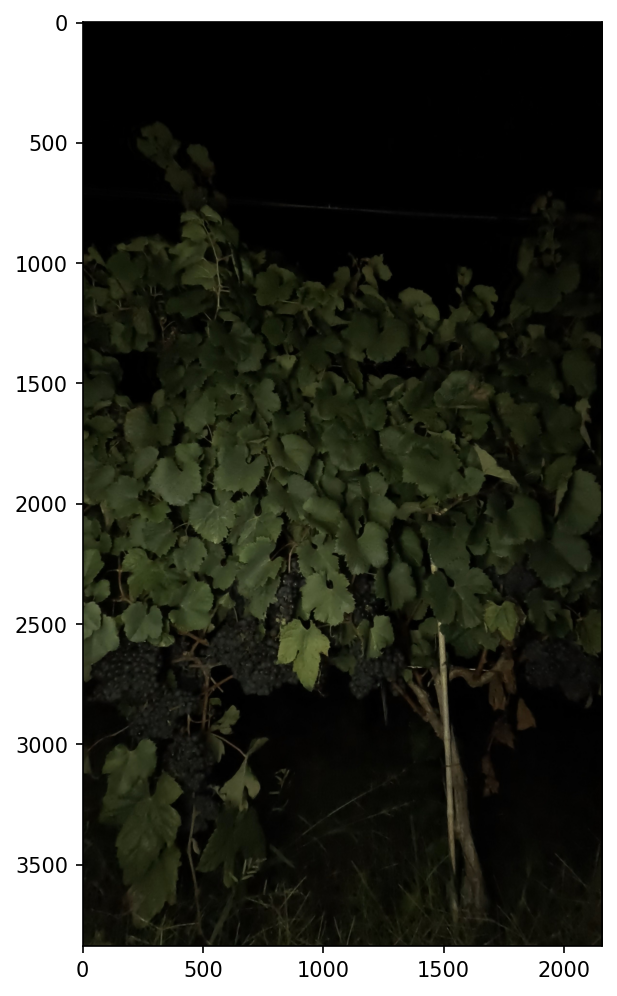

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt                # importar la biblioteca matplotlib

mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['savefig.dpi'] = 150

mpl.rcParams['font.size'] = 10
mpl.rcParams['legend.fontsize'] = 'small'
mpl.rcParams['figure.titlesize'] = 'small'

aspect_ratio = imagen.shape[1]/imagen.shape[0] # ignorar esta linea
plt.figure(figsize=(aspect_ratio*8,8))         # ignorar esta linea
plt.imshow(imagen)
plt.show()                                     # ignorar esta linea

## Slices en acción

Es importante entender que el uso de _slices_ es muy poderoso en imágenes. Podemos fácilmente recortar partes de imágenes y trabajar con ellas de esa manera. Podemos ver _canales_ independientes también, algo que veremos es muy útil. Veamos algunos ejemplos.
El uso de slices puede ser muy sofisticado. Es necesario practicar para entenerlo bien. 

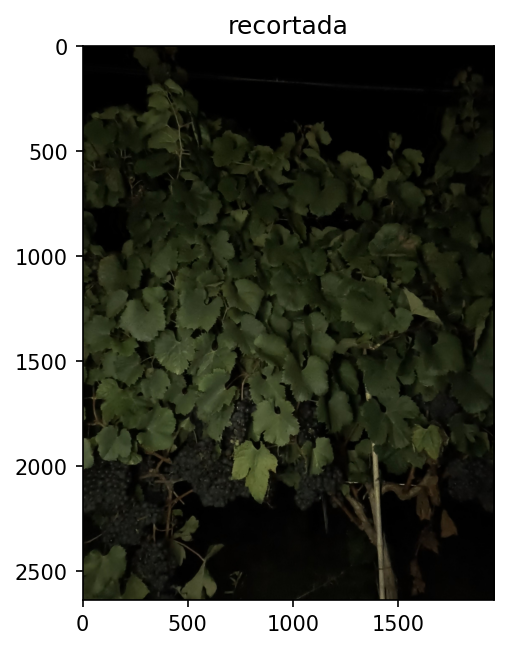

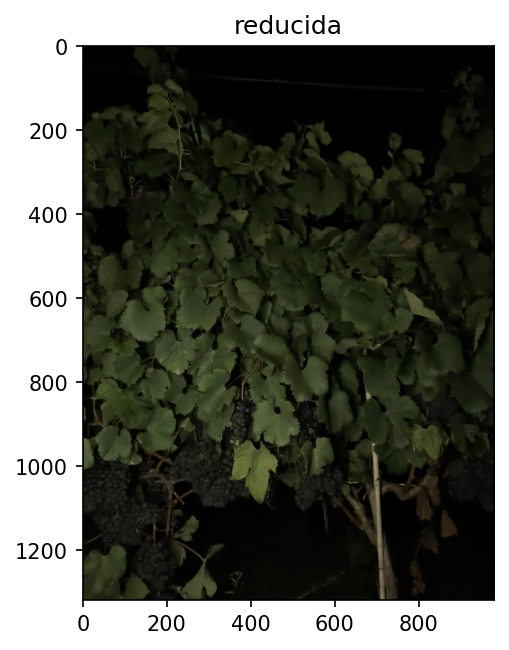

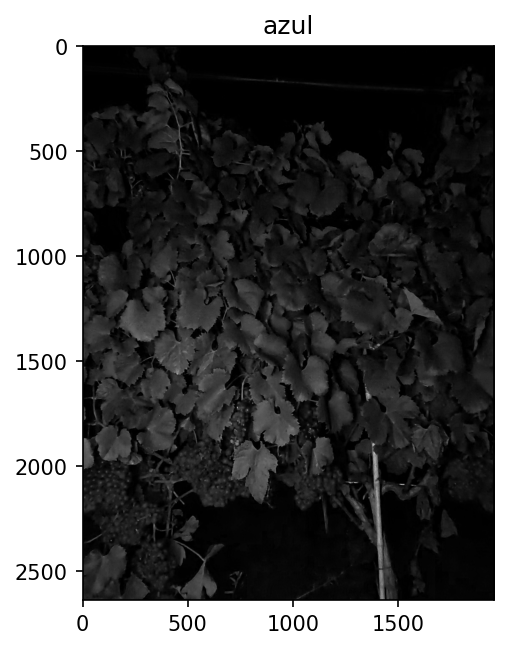

In [7]:
#
# mostramos una parte de la imagen
#
# los índices negativos indican 'desde el final'
# en el ejemplo de abajo empezamos en la fila 600 desde arriba y terminamos en la fila 600 desde el final (-600)
# tomamos las columnas desde la 100 hasta 100 desde el final (-100)
#
recortada = imagen[600:-600,100:-100,:] 
plt.imshow(recortada)
plt.title('recortada')
plt.show()
#
# también podemos saltearnos pixeles
# esta _no es una buena forma_ de reescalar, pero es muy rápida 
# el :2:  en el medio dice "saltear de a 2"; en resumen: 600:2:600 debe leerse
# ir desde la fila 600 de la izquierda, hasta la fila 600 desde la derecha, salteando de a 2
reducida = imagen[600:-600:2,100:-100:2,:] 
plt.imshow(reducida)
plt.title('reducida')
plt.show()
#
# también podemos mirar un sólo canal si tomamos un slice en la tercera dimensión
# el resultado no es una imagen azul: es una imagen sin información de color, 
# y por eso debemos proporcionar un 'mapa de colores' que haga la correspondencia entre
# intensidad (cantidad de azul) y un color. Vamos a usar escala de grises.
#
azul = imagen[600:-600,100:-100,2] # canal 2 es azul 
plt.imshow(azul,cmap='gray')
plt.title('azul')
plt.show()


## Modificando valores

Vamos a cambiar algunos valores en la imagen. También veremos cómo crear algunos tipos de matrices comunes que nos van a servir, por ejemplo, todo ceros o todo unos.

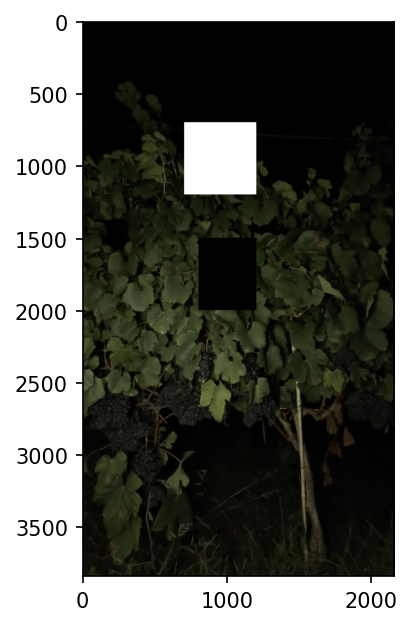

In [8]:
imagen2 = np.copy(imagen) # hacemos una copia
imagen2[700:1200,700:1200] = 255 # ponemos en blanco una parte de la imagen
imagen2[1500:2000,800:1200] = 0 # ponemos en negro otra parte
plt.imshow(imagen2)
plt.show()



## Algo de aritmética

La gracia de representar imágenes como matrices de números es que podemos hacer operaciones con ellas.
Ya vimos cómo sustituir valores. Veamos cómo hacer otras cosas sencillas. En este caso dejaremos que el estudiante interprete el significado de cada operación y su resultado.


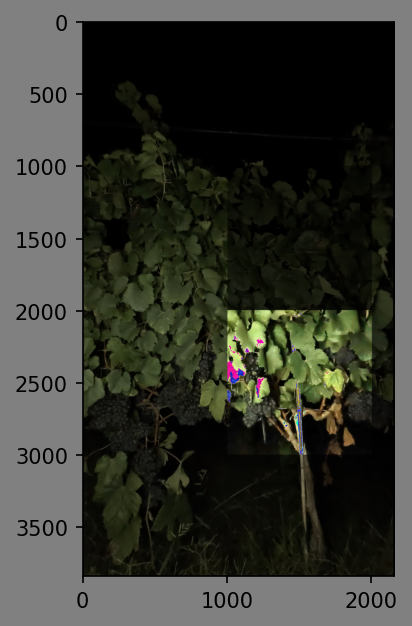

In [9]:
imagen3 = np.copy(imagen)
#
# reducir valores -> bajar brillo
#
imagen3[1000:2000,1000:2000] = imagen3[1000:2000,1000:2000] / 2

#
# aumentar valores -> subir brillo
#
imagen3[2000:3000,1000:2000] = imagen3[2000:3000,1000:2000] * 3

gris = (0.5,0.5,0.5)
plt.figure(facecolor=gris) # para que no incandile
plt.imshow(imagen3)
plt.show()


### Notan algo raro?

A esta altura podrán observar que aparecieron unos colores extraños en el rectánculo al que le aumentamos el brillo!!
La razón de esto es que, como los colores tienen un valor máximo de 255, al multiplicarlos por un valor mayor a $1$ obtuvimos colores inválidos! Es muy importante tener en cuenta que la representación de la imagen sigue siendo un conjunto de números, y distintos tipos de números (en este caso, enteros de 8 bits) tienen distintas limitaciones.

### Ojo con las representaciones 

Una cosa difícil de manejar (incluso con experiencia) es que según el _tipo_  de números utilizado, las bibliotecas interpretan los _valores_  de distinta manera. A grosso modo:

* Si los pixeles son _enteros_ (_integer_), entonces se asume que van de 0 (negro) a 255 (blanco)
* Si son flotantes (_flotantes_ o _float_), se asume que van de 0 (negro) a 1 (blanco)

Si se intenta guardar la imagen en un archivo, el resultado va a ser muy distinto al que se muestra.

Todo esto _es_ confuso y _no_ está bien diseñado. Hay que lidiar con ello con cuidado.

### Sugerencia: SIEMPRE convertir a punto flotante entre 0 y 1!!

La mejor forma de trabajar es:

* trabajar con las imágenes en punto flotante entre 0 y 1
* al guardarlas, sólo al guardarlas, convertirlas a 0-255 uint8

Ejemplo:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0 0.7098039215686275


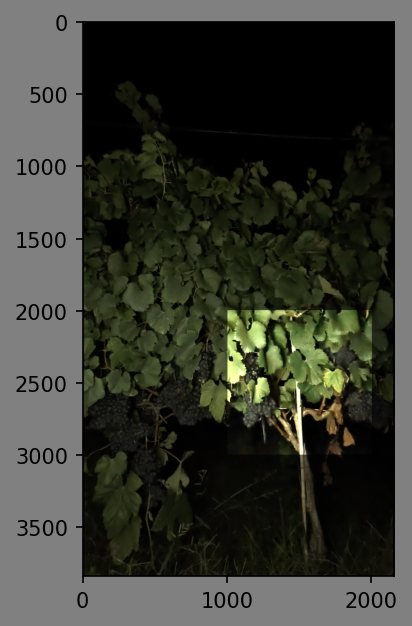

In [10]:

imagen4 = imagen/255
print(np.min(imagen4),np.max(imagen4))

imagen4[2000:3000,1000:2000] = imagen4[2000:3000,1000:2000] * 3
gris = (0.5,0.5,0.5)
plt.figure(facecolor=gris) # para que no incandile
plt.imshow(imagen4)
plt.show()


### Inspección de la salida

 Lo de arriba debería dar un mensaje de advertencia: los valores mayores a $1$ siguen siendo inválidos, pero ahora son interpretados automáticamente como _demasiado brillantes_ y mostrados de manera más natural.

 ### Guardando la imagen

 Veamos ahora cómo guardar una imagen bien, y cómo guardarla mal.
 



In [11]:
#
# esto no funciona (correr y luego comentar el código!)
#  
#skimage.io.imsave('mal.png',imagen4)  
#
# esto sí funciona, pero mal!
# al convertir a uint8, se interpretan los valores entre 0 y 255
# pero nuestra imagen apenas supera el valor 1.
# es decir, queda todo casi negro
#
print(np.max(imagen4))
imagen4_uint8 = imagen4.astype(np.uint8)
skimage.io.imsave('mal.png',imagen4_uint8) 
#
# reescalemos para que quede entre 0 y 255
#
imagen5 = imagen4*255
imagen5_uint8 = imagen5.astype(np.uint8)
skimage.io.imsave('no_tan_bien.png',imagen5_uint8)  # ups! se pasó de 255
#
# mejor: recortar valores
# ahora sí, la salida por lo menos se ve bien
# sigue con un problema: hay valores "saturados" (demasiado brillantes)
# pero por lo menos se ve bien
#
imagen5 = imagen4*255
imagen5_clip = np.minimum(255,imagen5)
imagen5_uint8 = imagen5_clip.astype(np.uint8)
skimage.io.imsave('mejor.png',imagen5_uint8)  






2.1294117647058823


/var/folders/0c/33mz8_w14nb9nf2jrszqd3wm0000gn/T/ipykernel_74114/2659994649.py:13: UserWarning: mal.png is a low contrast image
  skimage.io.imsave('mal.png',imagen4_uint8)


## Espacios de color

Posiblemente la forma más común de representar imágenes a color es en términos de los canales  'rojo', 'verde' y 'azul' (RGB) como vimos anteriormente.
Sin embargo, hay muchas formas de respresentar los colores de una imagen. La representación RGB no siempre es la más adecuada, principalmente porque no se relaciona directamente con la forma en que los humanos percibimos el color, es decir, en términos de cualidades como el _tono_, la _saturación_ o el _brillo o intensidad_. 
Debido a lo anterior, existen muchas (muchísimas) formas alternativas de representar los colores.
Una de ellas es la llamada HSV (Hue, Saturation, Value), que se traduce literalmente a 'tono', 'saturación' y 'valor'. 
Nuevamente la imagen se representa como una matriz de tamaño H x W x 3 en donde H es la altura y W es el ancho y la última dimensión indica el canal. La diferencia es que ahora el primer canal es H (no R), el segundo S (no G) y el último es V (no B).

Veamos ahora cómo se ven los distintos canales en ambas representaciones.



(-0.5, 2159.5, 3839.5, -0.5)

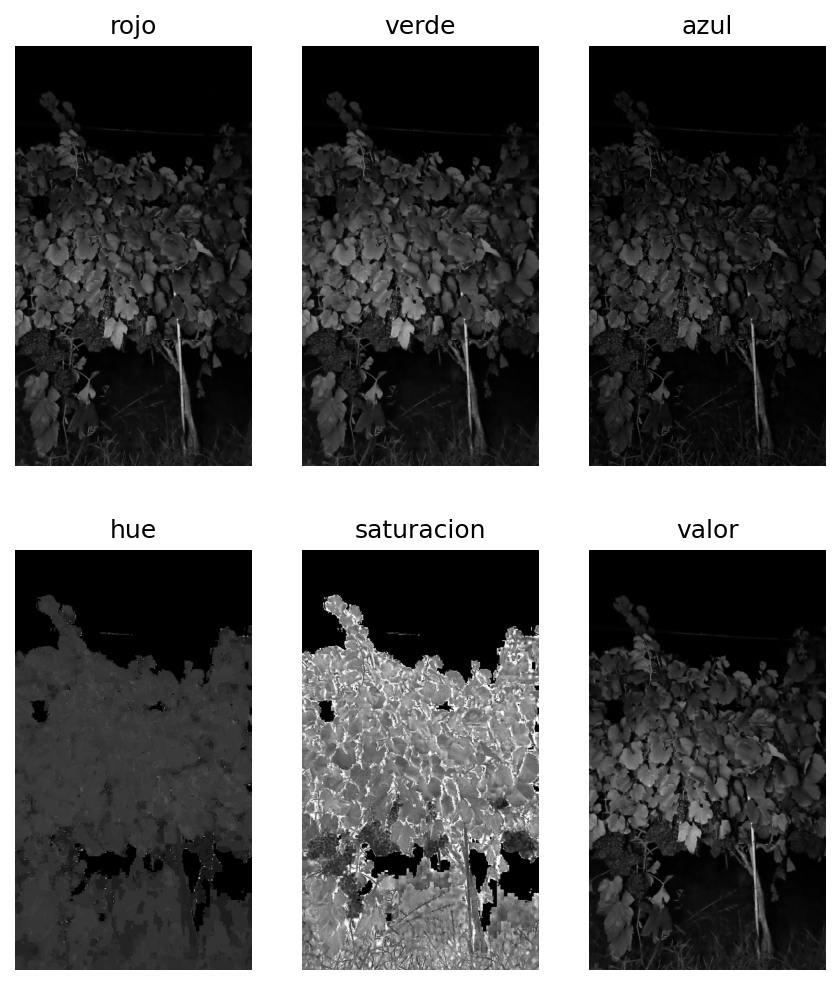

In [20]:
#
# sub-módulo de skimage para lidiar con colores
#
from skimage import color

imagen = imagen / 255
rojo  = imagen[:,:,0]
verde = imagen[:,:,1]
azul  = imagen[:,:,2]

#
# conversion de espacios de color
# 
imagen_hsv = color.rgb2hsv(imagen)
hue = imagen_hsv[:,:,0]
sat = imagen_hsv[:,:,1]
val = imagen_hsv[:,:,2]

plt.figure(figsize=(7,8))
plt.subplot(2,3,1)
plt.imshow(rojo,cmap='gray')
plt.title('rojo')
plt.axis('off')
plt.subplot(2,3,2)
plt.imshow(verde,cmap='gray')
plt.title('verde')
plt.axis('off')
plt.subplot(2,3,3)
plt.imshow(azul,cmap='gray')
plt.title('azul')
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(hue,cmap='gray')
plt.title('hue')
plt.axis('off')
plt.subplot(2,3,5)
plt.imshow(sat,cmap='gray')
plt.title('saturacion')
plt.axis('off')
plt.subplot(2,3,6)
plt.imshow(val,cmap='gray')
plt.title('valor')
plt.axis('off')
